In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("hare.dat")

In [ ]:
df

In [4]:
pd.date_range("1905", "1935", freq = "AS")
df.index = pd.date_range("1905", "1935", freq = "AS")

In [5]:
df["pred"] = 0

In [ ]:
df

In [ ]:
df.loc[: '1925-01-01',"hare"]

In [8]:
df.loc[ : "1925-01-01", "pred"] = df.loc[: '1925-01-01',"hare"]

In [9]:
df

,hare,pred
1905-01-01,50,50
1906-01-01,20,20
1907-01-01,20,20
1908-01-01,22,22
1909-01-01,27,27
1910-01-01,50,50
1911-01-01,55,55
1912-01-01,78,78
1913-01-01,70,70
1914-01-01,59,59


In [10]:
from statsmodels.tsa.arima_model import ARMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
ARMA(df.loc[: '1925-01-01',"pred"], (1, 0))

In [12]:
arma = ARMA(df.loc[: '1925-01-01',"pred"], (1, 0))
arma

In [13]:
result = arma.fit()

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -88.577
Method:                       css-mle   S.D. of innovations             16.183
Date:                Wed, 01 Sep 2021   AIC                            183.153
Time:                        10:41:03   BIC                            186.287
Sample:                    01-01-1905   HQIC                           183.833
                         - 01-01-1925                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2223     10.206      4.137      0.001      22.220      62.225
ar.L1.pred     0.6846      0.148      4.616      0.000       0.394       0.975
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4606           +0.0000j            1.4606            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -88.577
Method:                       css-mle   S.D. of innovations             16.183
Date:                Wed, 01 Sep 2021   AIC                            183.153
Time:                        10:43:46   BIC                            186.287
Sample:                    01-01-1905   HQIC                           183.833
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.2223     10.206      4.137      0.001      22.220      62.225
ar.L1.pred     0.6846      0.148      4.616      0.000       0.394       0.975
                                    Roots           

In [16]:
result.predict(start='1926-01-01', end='1935-01-01')

1926-01-01    31.115865
1927-01-01    34.618389
1928-01-01    37.016355
1929-01-01    38.658098
1930-01-01    39.782101
1931-01-01    40.551637
1932-01-01    41.078492
1933-01-01    41.439198
1934-01-01    41.686152
1935-01-01    41.855226
Freq: AS-JAN, dtype: float64

In [17]:
predict = result.predict(start='1926-01-01', end='1935-01-01')

In [18]:
df.loc["1926-01-01" : , "pred"] = predict

In [ ]:
df

In [21]:
import matplotlib.pyplot as plt

In [22]:
plt.style.use("ggplot")

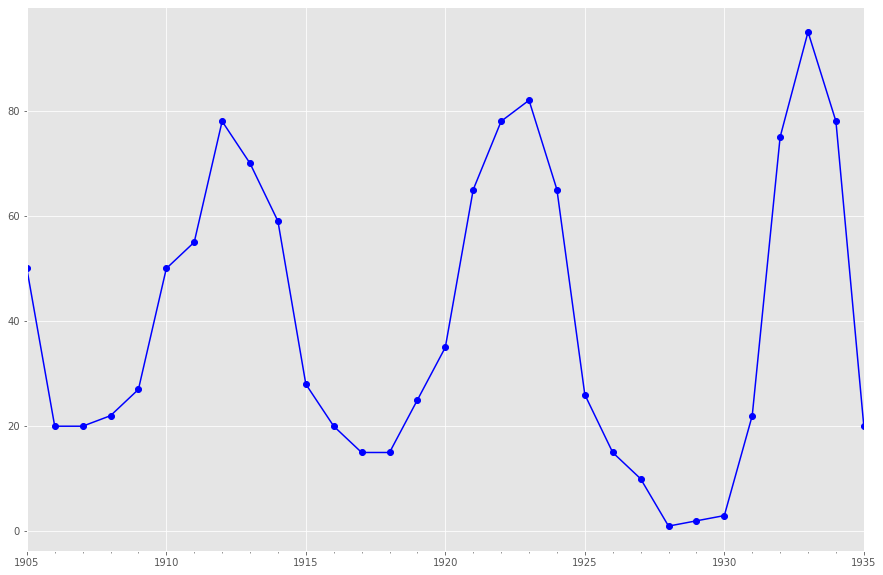

In [24]:
plt.figure(figsize=(15,10))
df.loc[ : , "hare"].plot(color="b", marker='o')

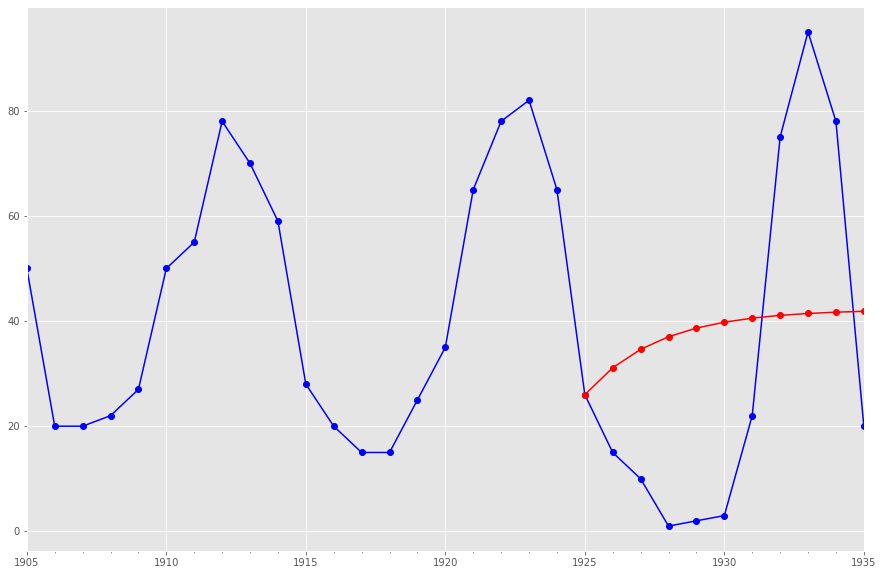

In [25]:
plt.figure(figsize=(15,10))
df.loc[ : , "hare"].plot(color="b", marker='o')
df.loc["1925-01-01":  , "pred"].plot(color="r", marker='o')

In [26]:
df.loc["1926-01-01": , ]

,hare,pred
1926-01-01,15,31.115865
1927-01-01,10,34.618389
1928-01-01,1,37.016355
1929-01-01,2,38.658098
1930-01-01,3,39.782101
1931-01-01,22,40.551637
1932-01-01,75,41.078492
1933-01-01,95,41.439198
1934-01-01,78,41.686152
1935-01-01,20,41.855226


In [27]:
df.loc["1926-01-01": , "hare" ]

1926-01-01    15
1927-01-01    10
1928-01-01     1
1929-01-01     2
1930-01-01     3
1931-01-01    22
1932-01-01    75
1933-01-01    95
1934-01-01    78
1935-01-01    20
Freq: AS-JAN, Name: hare, dtype: int64

In [28]:
df.loc["1926-01-01": , "pred" ]

1926-01-01    31.115865
1927-01-01    34.618389
1928-01-01    37.016355
1929-01-01    38.658098
1930-01-01    39.782101
1931-01-01    40.551637
1932-01-01    41.078492
1933-01-01    41.439198
1934-01-01    41.686152
1935-01-01    41.855226
Freq: AS-JAN, Name: pred, dtype: float64

In [29]:
cost = df.loc["1926-01-01": , "hare" ] - df.loc["1926-01-01": , "pred" ]
cost

1926-01-01   -16.115865
1927-01-01   -24.618389
1928-01-01   -36.016355
1929-01-01   -36.658098
1930-01-01   -36.782101
1931-01-01   -18.551637
1932-01-01    33.921508
1933-01-01    53.560802
1934-01-01    36.313848
1935-01-01   -21.855226
Freq: AS-JAN, dtype: float64

In [30]:
df.loc["1926-01-01": , "residual"] = cost

In [31]:
df

,hare,pred,residual
1905-01-01,50,50.000000,NaN
1906-01-01,20,20.000000,NaN
1907-01-01,20,20.000000,NaN
1908-01-01,22,22.000000,NaN
1909-01-01,27,27.000000,NaN
1910-01-01,50,50.000000,NaN
1911-01-01,55,55.000000,NaN
1912-01-01,78,78.000000,NaN
1913-01-01,70,70.000000,NaN
1914-01-01,59,59.000000,NaN


In [32]:
df.loc["1926-01-01": , "residual"]

1926-01-01   -16.115865
1927-01-01   -24.618389
1928-01-01   -36.016355
1929-01-01   -36.658098
1930-01-01   -36.782101
1931-01-01   -18.551637
1932-01-01    33.921508
1933-01-01    53.560802
1934-01-01    36.313848
1935-01-01   -21.855226
Freq: AS-JAN, Name: residual, dtype: float64

In [33]:
df.loc["1926-01-01": , "residual"] ** 2

1926-01-01     259.721096
1927-01-01     606.065053
1928-01-01    1297.177838
1929-01-01    1343.816161
1930-01-01    1352.922918
1931-01-01     344.163238
1932-01-01    1150.668684
1933-01-01    2868.759480
1934-01-01    1318.695564
1935-01-01     477.650909
Freq: AS-JAN, Name: residual, dtype: float64

In [34]:
( df.loc["1926-01-01": , "residual"] ** 2 ).sum()

11019.640942083002

In [35]:
len( df.loc["1926-01-01": , "residual"]  )

10

In [36]:
( df.loc["1926-01-01": , "residual"] ** 2 ).sum() / len( df.loc["1926-01-01": , "residual"]  )

1101.9640942083001

In [37]:
from sklearn.metrics import mean_squared_error
#MSE

In [38]:
mean_squared_error(df.loc["1926-01-01": , "hare" ] , df.loc["1926-01-01": , "pred" ])

1101.9640942083001

In [39]:
df.loc[ :"1925-01-01","pred"]

1905-01-01    50.0
1906-01-01    20.0
1907-01-01    20.0
1908-01-01    22.0
1909-01-01    27.0
1910-01-01    50.0
1911-01-01    55.0
1912-01-01    78.0
1913-01-01    70.0
1914-01-01    59.0
1915-01-01    28.0
1916-01-01    20.0
1917-01-01    15.0
1918-01-01    15.0
1919-01-01    25.0
1920-01-01    35.0
1921-01-01    65.0
1922-01-01    78.0
1923-01-01    82.0
1924-01-01    65.0
1925-01-01    26.0
Freq: AS-JAN, Name: pred, dtype: float64

In [40]:
ARMA( df.loc[ : "1925-01-01","pred"] , (2, 0) )

In [41]:
arma = ARMA( df.loc[ : "1925-01-01","pred"] , (2, 0) )

In [42]:
result = arma.fit()

In [43]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(2, 0)   Log Likelihood                 -82.514
Method:                       css-mle   S.D. of innovations             11.603
Date:                Wed, 01 Sep 2021   AIC                            173.029
Time:                        12:27:50   BIC                            177.207
Sample:                    01-01-1905   HQIC                           173.935
                         - 01-01-1925                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6210      5.501      7.747      0.000      31.838      53.404
ar.L1.pred     1.2870      0.164      7.827      0.000       0.965       1.609
ar.L2.pred    -0.7587      0.156     -4.863      0.000      -1.065      -0.453
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.8481           -0.7738j            1.1480           -0.1177
AR.2            0.8481           +0.7738j            1.1480            0.1177
-----------------------------------------------------------------------------
"""

In [44]:
print( result.summary() )

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(2, 0)   Log Likelihood                 -82.514
Method:                       css-mle   S.D. of innovations             11.603
Date:                Wed, 01 Sep 2021   AIC                            173.029
Time:                        12:27:54   BIC                            177.207
Sample:                    01-01-1905   HQIC                           173.935
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6210      5.501      7.747      0.000      31.838      53.404
ar.L1.pred     1.2870      0.164      7.827      0.000       0.965       1.609
ar.L2.pred    -0.7587      0.156     -4.863      0.0

In [45]:
result.predict(start="1926-01-01", end="1935-01-01")

1926-01-01     4.250857
1927-01-01     5.850971
1928-01-01    24.411939
1929-01-01    47.085110
1930-01-01    62.181849
1931-01-01    64.407979
1932-01-01    55.818601
1933-01-01    43.075387
1934-01-01    33.192382
1935-01-01    30.141983
Freq: AS-JAN, dtype: float64

In [46]:
prediction = result.predict(start="1926-01-01", end="1935-01-01")

In [47]:
prediction

1926-01-01     4.250857
1927-01-01     5.850971
1928-01-01    24.411939
1929-01-01    47.085110
1930-01-01    62.181849
1931-01-01    64.407979
1932-01-01    55.818601
1933-01-01    43.075387
1934-01-01    33.192382
1935-01-01    30.141983
Freq: AS-JAN, dtype: float64

In [48]:
df.loc["1926-01-01": ,"pred"] = prediction

In [49]:
df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"]

1926-01-01    10.749143
1927-01-01     4.149029
1928-01-01   -23.411939
1929-01-01   -45.085110
1930-01-01   -59.181849
1931-01-01   -42.407979
1932-01-01    19.181399
1933-01-01    51.924613
1934-01-01    44.807618
1935-01-01   -10.141983
Freq: AS-JAN, dtype: float64

In [50]:
cost = df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"]

In [51]:
df.loc["1926-01-01":  ,"residual"] = cost

In [52]:
df.loc["1926-01-01": ,"residual"] ** 2

1926-01-01     115.544075
1927-01-01      17.214438
1928-01-01     548.118866
1929-01-01    2032.667108
1930-01-01    3502.491245
1931-01-01    1798.436703
1932-01-01     367.926065
1933-01-01    2696.165401
1934-01-01    2007.722596
1935-01-01     102.859823
Freq: AS-JAN, Name: residual, dtype: float64

In [53]:
( df.loc["1926-01-01": ,"residual"] ** 2 ).sum()

13189.146319339858

In [54]:
( df.loc["1926-01-01": ,"residual"] ** 2 ).sum() /10

1318.9146319339857

In [55]:
mean_squared_error(df.loc["1926-01-01": ,"hare"], df.loc["1926-01-01": ,"pred"])

1318.9146319339857

In [56]:
arma = ARMA(df.loc[ : "1925-01-01","pred"], (3,0))

In [57]:
result = arma.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [58]:
print(result.summary())

                              ARMA Model Results                              
Dep. Variable:                   pred   No. Observations:                   21
Model:                     ARMA(3, 0)   Log Likelihood                 -90.255
Method:                       css-mle   S.D. of innovations              8.159
Date:                Wed, 01 Sep 2021   AIC                            190.510
Time:                        12:29:18   BIC                            195.733
Sample:                    01-01-1905   HQIC                           191.644
                         - 01-01-1925                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6043        nan        nan        nan         nan         nan
ar.L1.pred     0.8958   4.75e-06   1.88e+05      0.000       0.896       0.896
ar.L2.pred     0.0587   3.98e-07   1.47e+05      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:1441: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


In [59]:
result.predict(start="1926-01-01", end="1935-01-01")

1926-01-01     1.760791
1927-01-01   -10.777037
1928-01-01     2.867297
1929-01-01    30.697995
1930-01-01    64.882334
1931-01-01    87.935932
1932-01-01    91.826108
1933-01-01    73.613173
1934-01-01    41.982156
1935-01-01     9.956640
Freq: AS-JAN, dtype: float64

In [60]:
prediction = result.predict(start="1926-01-01", end="1935-01-01")

In [61]:
prediction

1926-01-01     1.760791
1927-01-01   -10.777037
1928-01-01     2.867297
1929-01-01    30.697995
1930-01-01    64.882334
1931-01-01    87.935932
1932-01-01    91.826108
1933-01-01    73.613173
1934-01-01    41.982156
1935-01-01     9.956640
Freq: AS-JAN, dtype: float64

In [62]:
df.loc["1926-01-01": , "pred"] = prediction

In [ ]:
df

In [64]:
df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"] 

1926-01-01    13.239209
1927-01-01    20.777037
1928-01-01    -1.867297
1929-01-01   -28.697995
1930-01-01   -61.882334
1931-01-01   -65.935932
1932-01-01   -16.826108
1933-01-01    21.386827
1934-01-01    36.017844
1935-01-01    10.043360
Freq: AS-JAN, dtype: float64

In [65]:
df.loc["1926-01-01": , "residual"]=df.loc["1926-01-01": , "hare"] - df.loc["1926-01-01": , "pred"] 

In [66]:
mean_squared_error(df.loc["1926-01-01": , "hare"] ,df.loc["1926-01-01": , "pred"] )

1174.9662467246856

In [67]:
import itertools

In [68]:
p = range(1, 11)
p

range(1, 11)

In [69]:
q = [0]

In [70]:
d = [0]

In [71]:
itertools.product(p,d,q)

In [72]:
list( itertools.product(p,d,q) )

[(1, 0, 0),
 (2, 0, 0),
 (3, 0, 0),
 (4, 0, 0),
 (5, 0, 0),
 (6, 0, 0),
 (7, 0, 0),
 (8, 0, 0),
 (9, 0, 0),
 (10, 0, 0)]

In [73]:
order_list = list( itertools.product(p,d,q) )